In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [64]:
left = df[df.left==1]
retention = df[df.left==0]

<Axes: xlabel='salary'>

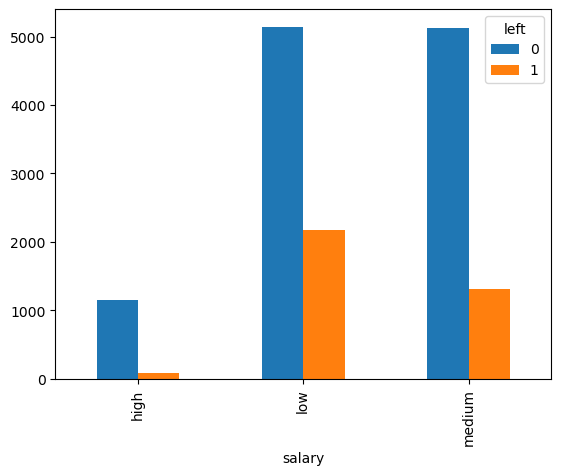

In [65]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

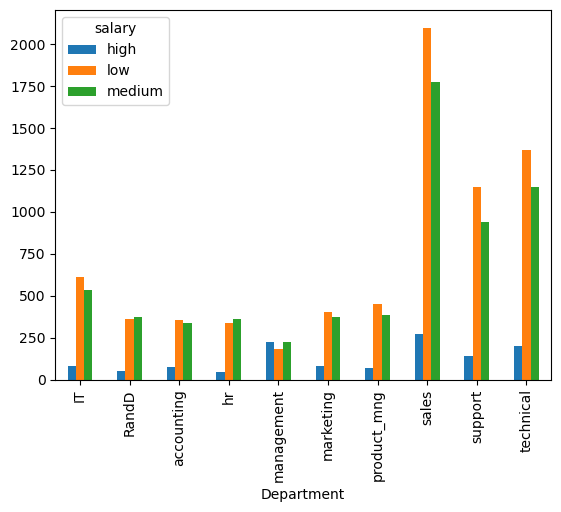

In [66]:

pd.crosstab(df.Department,df.salary).plot(kind='bar')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

In [68]:
xDf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
xDf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [69]:
sal_dum = pd.get_dummies(xDf['salary'], prefix='sal')
sal_dum

,sal_high,sal_low,sal_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [70]:
dfFin = pd.concat([xDf, sal_dum], axis='columns')
dfFin

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,sal_high,sal_low,sal_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [71]:
dfFin.drop('salary',axis='columns', inplace=True)
dfFin.drop('sal_medium',axis='columns', inplace=True)

In [72]:
x = dfFin
y = df.left

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

In [74]:
model.fit(x_train, y_train)

LogisticRegression()

In [75]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [76]:
model.score(x_test, y_test)

0.79